In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
m,g,l,t,A=sp.symbols(r'm,g,l,t,A',real=True)
T,V,L=sp.symbols('T,V,L')
y=sp.Function('y')(t)
y

y(t)

In [2]:
dy_dt=sp.diff(y,t)
dy_dt

Derivative(y(t), t)

In [3]:
T=(m/2)*(l*dy_dt)**2
T

l**2*m*Derivative(y(t), t)**2/2

In [4]:
V=m*g*l*(1-sp.cos(y))
V

g*l*m*(1 - cos(y(t)))

In [5]:
L=T-V
L

-g*l*m*(1 - cos(y(t))) + l**2*m*Derivative(y(t), t)**2/2

In [6]:
eq=sp.diff(L,y)-sp.diff(sp.diff(L,dy_dt),t)
eq

-g*l*m*sin(y(t)) - l**2*m*Derivative(y(t), (t, 2))

In [7]:
eq=eq.subs(sp.sin(y),y)
eq

-g*l*m*y(t) - l**2*m*Derivative(y(t), (t, 2))

In [8]:
sol=sp.dsolve(eq,y,ics={y.subs(t,0): A, dy_dt.subs(t, 0): 0})
sol=sol.subs(sp.sqrt(-g/l),sp.I*sp.sqrt(g/l)).simplify()
sol

Eq(y(t), A*cos(t*sqrt(g/l)))

In [9]:
exp=sol.rhs
exp

A*cos(t*sqrt(g/l))

In [12]:
f=sp.lambdify(t,exp.subs(g,9.81).subs(l,1).subs(A,5),'numpy')

SyntaxError: invalid syntax (<lambdifygenerated-2>, line 1)

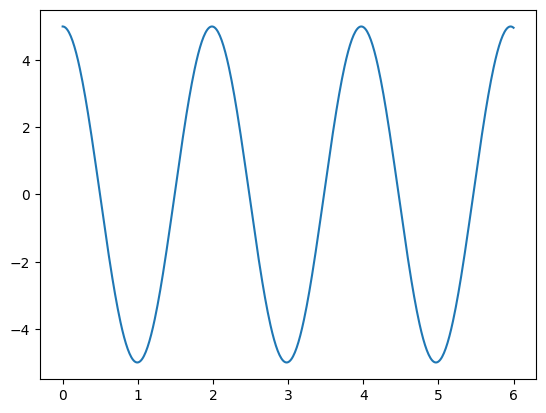

In [11]:
t=np.linspace(0,6,500)
plt.plot(t,f(t))